# Machine Learning Lab-1



## Numpy 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
# 1) Create a Numpy array of size 4 x 5.
arr = np.zeros((4,5))
print(arr)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
# 2) Randomly initialize the array.
arr = np.empty((4,5))
arr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# 3) Get the Transpose of the Matrix that you created. Create a square matrix and find its determinant.
arr = np.empty((4,5))
arr.T
print(arr) # Transposed

arr = np.array([[1,2,3],[2,3,4],[3,4,5]])
print(arr)
print(np.linalg.det(arr))


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1 2 3]
 [2 3 4]
 [3 4 5]]
0.0


In [ ]:
# 4) Create another matrix of size 5 x 4 and randomly initialize it.
arr = np.empty((5,4))
arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# 5.) Perform a matrix multiplication
arr = np.array([[1,2,3],[2,3,4],[3,4,5]])
arr1 = np.array([[11,2,4],[8,3,6],[2,5,9]])
print(np.matmul(arr,arr1))

[[33 23 43]
 [54 33 62]
 [75 43 81]]


In [ ]:
# 6) Perform element wise matrix multiplication.
arr = np.array([[1,2,3],[2,3,4],[3,4,5]])
arr1 = np.array([[11,2,4],[8,3,6],[2,5,9]])
print(arr*arr1)

[[11  4 12]
 [16  9 24]
 [ 6 20 45]]


In [ ]:
# 7) Find mean, median of the numpy array created.
arr = np.array([[1,2,3],[2,3,4],[3,4,5]])
print(arr.mean())
print(np.median(arr))

3.0
3.0


In [ ]:
# 8) Obtain each row in the second column of the first array.
arr = np.array([[1,2,3],[2,3,4],[3,100,5]])
print(arr[:,1])

[  2   3 100]


In [ ]:
# 9) Convert Numeric entries(columns) of Iris.csv to Mean Centered Version
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-1/Iris.csv")
data = np.array(df.to_numpy()[0:,:5])
centered = data - data.mean()
centered.mean() #-4.0965157192355643e-14 ≅ 0


-4.0965157192355643e-14

In [ ]:
# 10) Study about numpy array attributes and implement it on the first matrix.
arr = np.array([[1,2,3],[2,3,4],[3,100,5]])
print(arr.shape)
print(arr.itemsize)
print(arr.flags)
print(arr.flat)

(3, 3)
8
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False




## NLTK and matplotlib 


In [ ]:
# Importing dataset in data frame.
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Ml-LabData/Lab-1/spam_or_not_spam.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0


In [ ]:
# Checking for null values
df.isna().sum()

email     1
label    16
dtype: int64

In [ ]:
import nltk 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt 
import random

In [ ]:
emails =  df["email"]
labels = df["label"]

In [ ]:
l = labels.dropna()

In [ ]:
l.isna().sum()

0

In [ ]:
fig = plt.figure(figsize=(5, 5))
x = l.value_counts(normalize=False)

<Figure size 360x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f5fe7d4e390>,
 [Text(-0.5500000594609761, -0.9526279098330696, 'not spam'),
  Text(0.5500001040567062, 0.9526278840857078, 'spam')],
 [Text(-0.3000000324332597, -0.5196152235453106, '83.33%'),
  Text(0.30000005675820335, 0.519615209501295, '16.67%')])

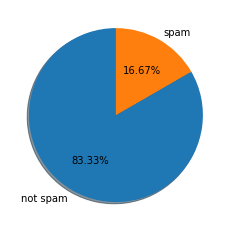

In [ ]:
plt.pie(x,labels = ["not spam","spam"],autopct='%.2f%%',shadow=True,startangle=90)
# Plotting the no of spam and non spam labels

In [ ]:
# From above example we can see the data set is not a balanced dataset.

In [ ]:
# Now we would preprocess data
print(emails) #Some samples from the dataset

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
nltk.download('stopwords') #Importing ntlk stopwords for removing stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re # library for regular expression operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer  # module for tokenizing strings

In [ ]:
email = emails[4]
tokenizer = TweetTokenizer(preserve_case=False) # making an instance of tokenizer
tokenized_text = tokenizer.tokenize(email)
tokenized_text[0:10] # printing sample from tokenized text

['in',
 'adding',
 'cream',
 'to',
 'spaghetti',
 'carbonara',
 'which',
 'has',
 'the',
 'same']

In [ ]:
print(emails[4][0:58],tokenized_text[0:10]) #comparing original text and tokenized text

 in adding cream to spaghetti carbonara which has the same ['in', 'adding', 'cream', 'to', 'spaghetti', 'carbonara', 'which', 'has', 'the', 'same']


In [ ]:
# Removing stopwords form email
stopwords_english = stopwords.words('english')
# removing
cleaned_text = []
for word in tokenized_text:
  if word not in stopwords_english and word not in string.punctuation:
    cleaned_text.append(word)
print("Raw Tokenized Text",tokenized_text[0:10],"Cleaned Text",cleaned_text[0:10])

Raw Tokenized Text ['in', 'adding', 'cream', 'to', 'spaghetti', 'carbonara', 'which', 'has', 'the', 'same'] Cleaned Text ['adding', 'cream', 'spaghetti', 'carbonara', 'effect', 'pasta', 'making', 'pizza', 'deep', 'pie']


In [ ]:
stemmer = PorterStemmer()
stemmed_text = []
for word in cleaned_text:
  stemmed_word = stemmer.stem(word)
  stemmed_text.append(stemmed_word)

print("Cleaned Text",cleaned_text[0:10],"Stemmed Text",stemmed_text[0:10])

Cleaned Text ['adding', 'cream', 'spaghetti', 'carbonara', 'effect', 'pasta', 'making', 'pizza', 'deep', 'pie'] Stemmed Text ['ad', 'cream', 'spaghetti', 'carbonara', 'effect', 'pasta', 'make', 'pizza', 'deep', 'pie']


In [ ]:
# we can see that the adding word is stemmed to ad.
# similary favourite is stemmed to favouri

## Matplotlib Examples

In [ ]:
x = [20,30,40,10,22,32,14,6,99]
y = [10,20,33,12,78,44,33,6,1]

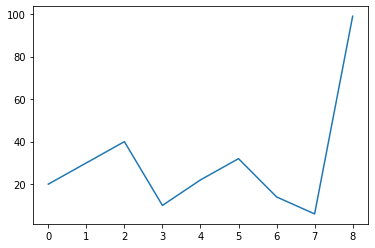

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x)

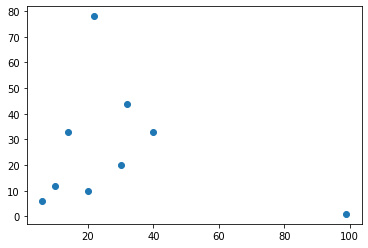

In [ ]:
plt.scatter(x,y)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f5fe74b4b90>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f5fe74b4d10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f5fe74b4a50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f5fe74b4dd0>}

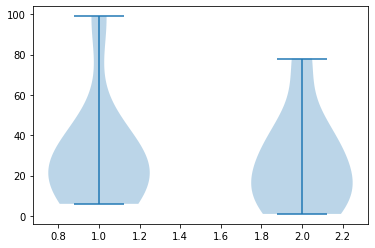

In [ ]:
plt.violinplot([x,y])

# Sklearn 

In [16]:
import numpy as np
import matplotlib as plt
from sklearn import datasets 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression

In [2]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
features = data.feature_names
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Features name description as per sklearn documentation.

 * CRIM per capita crime rate by town

 * ZN proportion of residential land zoned for lots over 25,000 sq.ft.

 * INDUS proportion of non-retail business acres per town

 * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 * NOX nitric oxides concentration (parts per 10 million)

 * RM average number of rooms per dwelling

 * AGE proportion of owner-occupied units built prior to 1940

 * DIS weighted distances to five Boston employment centres

 * RAD index of accessibility to radial highways

 * TAX full-value property-tax rate per $10,000

 * PTRATIO pupil-teacher ratio by town

 * B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

 * LSTAT % lower status of the population

 * MEDV Median value of owner-occupied homes in $1000’s







In [10]:
target = data.target
print("Target labels for boston dataset in *10000$",target[0:10])

Target labels for boston dataset in *10000$ [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [11]:
X = data.data
Y = data.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

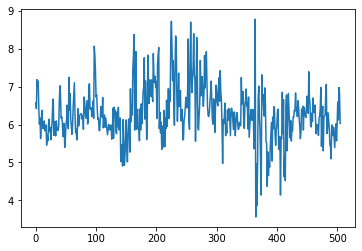

In [35]:
import matplotlib.pyplot as plt
# plt.plot(X[:,0])
# plt.plot(X[:,1])
# plt.plot(X[:,2])
# plt.plot(X[:,3])
plt.plot(X[:,5]) # as we can see this is near linear graph for linear regression hence we would use this as feature.

In [39]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [40]:
regressor.score(X_test,Y_test)

0.7836295385076287

In [41]:
# From the above result we see it is 78% accurate we can improve this by dropping some non linear features

# Pandas 

In [44]:
import pandas as pd
import sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [45]:
data = datasets.load_iris()
X = data.data
Y = data.target

In [47]:
feature_names = data.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


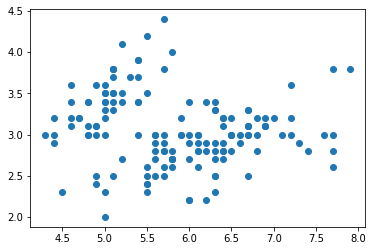

In [62]:
# Plot between sepal length vs sepal width
plt.scatter(X[:,0],X[:,1]) #Scatter plot between X -> sepal length in (cm) VS Y -> sepal width (cm)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

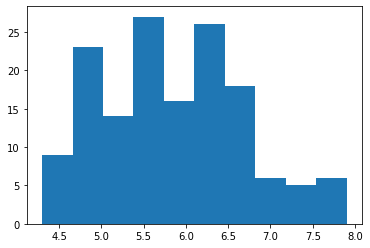

In [63]:
plt.hist(X[:,0]) # Histogram for sepal length in cm

In [65]:
Targets = data.target_names
print(Targets)

['setosa' 'versicolor' 'virginica']


In [74]:
# { 0->setosa , 1->Versicolor , 3->virginica}
df = pd.DataFrame(Y)

In [79]:
bar_data = df.value_counts()

In [89]:
bar_data = bar_data.to_dict()

<BarContainer object of 3 artists>

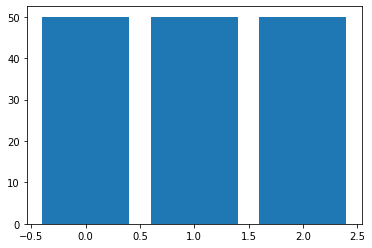

In [98]:
plt.bar([0,1,2],bar_data.values())

In [99]:
df = pd.DataFrame(data.data)

In [103]:
# Converted original data to dataframe
df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [104]:
# As from above data we can infer that there are no null values

In [107]:
df.iloc[0:5] # 5) 1) Print first 5 rows of SepalLengthCm.

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
# 2) Print from 5th row and onwards and entire column of Iris.csv dataset.
df.iloc[5:]

,0,1,2,3
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
